In [1]:
from math import exp, log, pi, sqrt

In [37]:
def norm_pdf(X):
    """
    Standard normal probability density function
    """
    
    return (1/(2 * pi) ** 2) * exp(-0.5 * X * X)

In [30]:
def norm_cdf(X):
    """
    An approximation to the cumulative distribution function for the normal
    standard distribution:
    """
    k = 1 / (1 + (0.2316419 * X))
    
    k_sum = k * (-0.319381530  - (0.356563782 * k) + (1.781477937 * k * k) - (1.821255978 * k * k * k) + (1.330274429 * k * k * k * k))
    
    if X >= 0.0:
        
        return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * X * X) * k_sum)
    
    else:
        return 1.0 - norm_cdf(-X)

In [18]:
def d_j(j, S, K, r, v, T):
    
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

In [40]:
d_j(2,52,50,0.05,0.12,1/2)

0.7144219558508293

In [14]:
def vanilla_call_price(S, K, r, v, T):
    # S = share price, K = strike price, r = risk-free rate, T = time to maturity, v = volatility
    
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

In [44]:
def vanilla_put_price(S, K, r, v, T):
    # S = share price, K = strike price, r = risk-free rate, T = time to maturity, v = volatility
    
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

In [66]:
call_prices = []

for x in range(10,20,1):
    
    call_prices.append(vanilla_call_price(55,50,0.05,x/10,1/2))

volatilities = list(range(10,20,1))

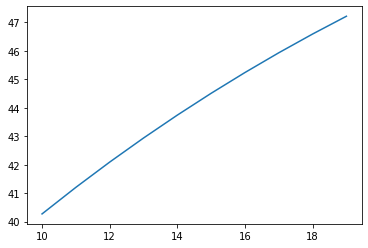

In [68]:
import matplotlib.pyplot as plt

plt.plot(volatilities,call_prices)